# Problem Set 1 - Neural network implementation

As described in section "3 Neural network implementation" of assignment 1, the goal is to build a shallow neural network from scratch using different approaches. To validate that your code is working and that the network is actually learning something, please use the following MNIST classification task. Finally, please submit proof of the learning progress as described in the assignment.

## Imports

In [4]:
import random
import pandas as pd
import numpy as np
from sklearn import model_selection
import sklearn.datasets as sk_datasets
import torchvision.datasets as torch_datasets
from torchvision import transforms
import torch
import matplotlib.pyplot as plt

from scratch.network import Network
from scratch.res_network import ResNetwork #To be added: pytorch torch network
from scratch.utils import *
from pytorch.network import TorchNetwork

/opt/anaconda3/envs/DL_2025/lib/python3.10/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/opt/anaconda3/envs/DL_2025/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <0B7EB158-53DC-3403-8A49-22178CAB4612> /opt/anaconda3/envs/DL_2025/lib/python3.10/site-packages/torchvision/image.so
  Reason: tried: '/opt/anaconda3/envs/DL_2025/lib/python3.10/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/DL_2025/lib/python3.10/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/DL_2025/lib/python3.10/lib-dynload/../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/DL_2025/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `li

In [5]:
# Automatically load changes in imported modules
%load_ext autoreload
%autoreload 2

# Explicitly set seed for reproducibility
GLOBAL_RANDOM_STATE = 42

random.seed(GLOBAL_RANDOM_STATE)
np.random.seed(GLOBAL_RANDOM_STATE)

## A) Neural Network Classifier from Scratch

### Data

In [6]:
# Download MNIST dataset
x, y_cat = sk_datasets.fetch_openml('mnist_784', version=1, return_X_y=True, cache=True, as_frame=False) #Fetching the mnist dataset sk_learn database

# Preprocess dataset
x = (x / 255).astype('float32') #Diving each image into a pixel value to rescale between 0-1 which means that we normalise the dataset
y_cat = y_cat.astype(int)
# One-hot encode y
y = np.zeros((len(y_cat), 10))
for i, val in enumerate(y_cat):
    y[i, val] = 1

# Use only small subset of data for faster training
x = x[:1000]
y = y[:1000]

# Split data into train and validation set
x_train, x_val, y_train, y_val = model_selection.train_test_split(x, y, test_size=0.2, random_state=GLOBAL_RANDOM_STATE)



/opt/anaconda3/envs/DL_2025/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### ML Model & Training

In [17]:
#Running the model that we built from scratch 
fnn = Network(sizes=[784, 128, 64, 10], learning_rate=0.1, epochs=30)
scratch_network = fnn.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=False)

Epoch: 1, Training Time: 0.37s, Training Accuracy: 58.00%, Validation Accuracy: 57.50%
Epoch: 2, Training Time: 0.74s, Training Accuracy: 80.12%, Validation Accuracy: 74.00%
Epoch: 3, Training Time: 1.11s, Training Accuracy: 85.88%, Validation Accuracy: 79.50%
Epoch: 4, Training Time: 1.52s, Training Accuracy: 89.25%, Validation Accuracy: 82.00%
Epoch: 5, Training Time: 1.92s, Training Accuracy: 91.88%, Validation Accuracy: 83.50%
Epoch: 6, Training Time: 2.34s, Training Accuracy: 94.38%, Validation Accuracy: 84.50%
Epoch: 7, Training Time: 2.73s, Training Accuracy: 95.50%, Validation Accuracy: 84.50%
Epoch: 8, Training Time: 3.15s, Training Accuracy: 96.00%, Validation Accuracy: 85.00%
Epoch: 9, Training Time: 3.55s, Training Accuracy: 97.50%, Validation Accuracy: 85.50%
Epoch: 10, Training Time: 3.93s, Training Accuracy: 98.38%, Validation Accuracy: 86.50%
Epoch: 11, Training Time: 4.32s, Training Accuracy: 98.62%, Validation Accuracy: 86.50%
Epoch: 12, Training Time: 4.71s, Training

### Test cosine annealing scheduler

In [16]:
# Running the model to test using the cosine annealing scheduler
cosine_scheduler = fnn.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=True)

Epoch: 1, Training Time: 0.37s, Training Accuracy: 100.00%, Validation Accuracy: 89.50%
Epoch: 2, Training Time: 0.75s, Training Accuracy: 100.00%, Validation Accuracy: 89.50%
Epoch: 3, Training Time: 1.15s, Training Accuracy: 100.00%, Validation Accuracy: 89.50%
Epoch: 4, Training Time: 1.60s, Training Accuracy: 100.00%, Validation Accuracy: 90.00%
Epoch: 5, Training Time: 1.98s, Training Accuracy: 100.00%, Validation Accuracy: 90.00%
Epoch: 6, Training Time: 2.37s, Training Accuracy: 100.00%, Validation Accuracy: 90.00%
Epoch: 7, Training Time: 2.75s, Training Accuracy: 100.00%, Validation Accuracy: 90.00%
Epoch: 8, Training Time: 3.13s, Training Accuracy: 100.00%, Validation Accuracy: 90.00%
Epoch: 9, Training Time: 3.50s, Training Accuracy: 100.00%, Validation Accuracy: 89.50%
Epoch: 10, Training Time: 3.87s, Training Accuracy: 100.00%, Validation Accuracy: 89.50%
Epoch: 11, Training Time: 4.23s, Training Accuracy: 100.00%, Validation Accuracy: 89.50%
Epoch: 12, Training Time: 4.59

### Test residual neural network

In [15]:
res_nn = ResNetwork(sizes=[784, 128, 128, 10], learning_rate=1, epochs=30)
residual_network = res_nn.fit(x_train, y_train, x_val, y_val)

⚠️ Residual connection skipped at Layer 1 (shape mismatch)
 Residual connection applied at Layer 2
⚠️ Residual connection skipped at Layer 1 (shape mismatch)
 Residual connection applied at Layer 2
⚠️ Residual connection skipped at Layer 1 (shape mismatch)
 Residual connection applied at Layer 2
⚠️ Residual connection skipped at Layer 1 (shape mismatch)
 Residual connection applied at Layer 2
⚠️ Residual connection skipped at Layer 1 (shape mismatch)
 Residual connection applied at Layer 2
⚠️ Residual connection skipped at Layer 1 (shape mismatch)
 Residual connection applied at Layer 2
⚠️ Residual connection skipped at Layer 1 (shape mismatch)
 Residual connection applied at Layer 2
⚠️ Residual connection skipped at Layer 1 (shape mismatch)
 Residual connection applied at Layer 2
⚠️ Residual connection skipped at Layer 1 (shape mismatch)
 Residual connection applied at Layer 2
⚠️ Residual connection skipped at Layer 1 (shape mismatch)
 Residual connection applied at Layer 2
⚠️ Residua

## B) Neural Network Classifier using Torch

### Data

In [22]:
# Define data preprocessing steps
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5,), (0.5,))
            ])

# Download MNIST dataset
train_set = torch_datasets.MNIST('data', train=True, download=True, transform=transform)
val_set = torch_datasets.MNIST('data', train=False, download=True, transform=transform)

# Use only small subset of data for faster training
train_set = torch.utils.data.Subset(train_set, range(1000))
val_set = torch.utils.data.Subset(val_set, range(1000))

# Utilize PyTorch DataLoader from simplified & harmonized loading of data
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=1)


### ML Model & Training

In [26]:
#Running the model via pytorch
torch_nn = TorchNetwork(sizes=[784, 128, 64, 10], learning_rate=0.1, epochs=30, random_state=GLOBAL_RANDOM_STATE)
pytorch_classification = torch_nn.fit(train_loader, val_loader)

Epoch: 1, Training Time: 1.47s, Learning Rate: 0.1, Training Accuracy: 11.70%, Validation Accuracy: 9.90%
Epoch: 2, Training Time: 2.97s, Learning Rate: 0.1, Training Accuracy: 22.60%, Validation Accuracy: 20.80%
Epoch: 3, Training Time: 4.53s, Learning Rate: 0.1, Training Accuracy: 31.20%, Validation Accuracy: 29.30%
Epoch: 4, Training Time: 6.08s, Learning Rate: 0.1, Training Accuracy: 41.10%, Validation Accuracy: 38.30%
Epoch: 5, Training Time: 7.67s, Learning Rate: 0.1, Training Accuracy: 49.90%, Validation Accuracy: 47.60%
Epoch: 6, Training Time: 9.12s, Learning Rate: 0.1, Training Accuracy: 58.30%, Validation Accuracy: 54.90%
Epoch: 7, Training Time: 10.57s, Learning Rate: 0.1, Training Accuracy: 59.00%, Validation Accuracy: 53.90%
Epoch: 8, Training Time: 12.02s, Learning Rate: 0.1, Training Accuracy: 59.20%, Validation Accuracy: 53.30%
Epoch: 9, Training Time: 14.24s, Learning Rate: 0.1, Training Accuracy: 62.00%, Validation Accuracy: 53.40%
Epoch: 10, Training Time: 16.31s, L

## C) Visualize accuracy & hyperparameter tuning

Here, you should compare the accuracy of all trained models. Optionally, you can also show the results of hyperparameter tuning and comment which hyperparameters work best for this task.

Epoch: 30, Training Time: 11.11s, Training Accuracy: 100.00%, Validation Accuracy: 89.50%


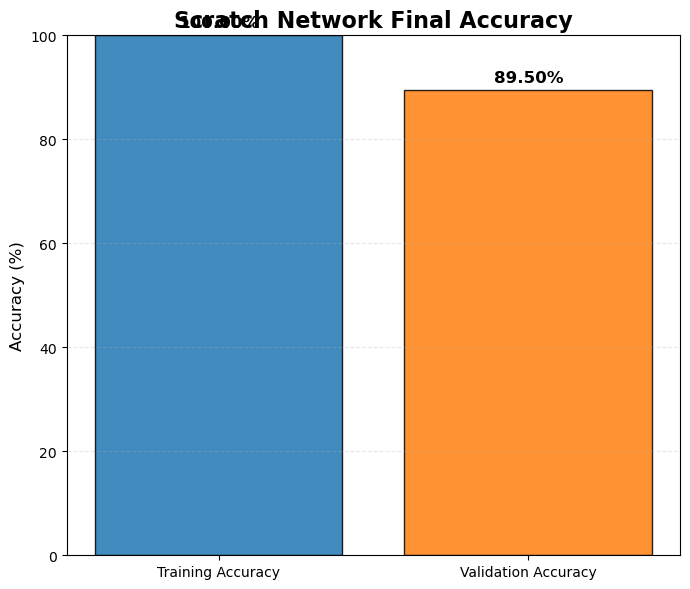

In [31]:
# Train the scratch network
scratch_network = Network(sizes=[784,128,64,10], learning_rate=0.1, epochs=30)
scratch_history = scratch_network.fit(x_train, y_train, x_val, y_val)

# Final accuracies in %
final_train_acc = scratch_history["acc"][-1] * 100
final_val_acc   = scratch_history["val_acc"][-1] * 100

# Plot
plt.figure(figsize=(7,6))
bars = plt.bar(["Training Accuracy", "Validation Accuracy"],
               [final_train_acc, final_val_acc],
               color=["#1f77b4", "#ff7f0e"], alpha=0.85, edgecolor="black")

# Add annotations
for bar, acc in zip(bars, [final_train_acc, final_val_acc]):
    plt.text(bar.get_x() + bar.get_width()/2., acc + 1,
             f"{acc:.2f}%", ha="center", va="bottom",
             fontsize=12, fontweight="bold")

plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Scratch Network Final Accuracy", fontsize=16, fontweight="bold")
plt.ylim(0, 100)
plt.grid(axis="y", alpha=0.3, linestyle="--")

plt.tight_layout()
plt.show()